In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

In [90]:
df = pd.read_csv('Dane2.csv', sep=';')
X = df.drop('OK', axis=1)
y = df['OK']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[1 3]
 [0 7]]


              precision    recall  f1-score   support

       False       1.00      0.25      0.40         4
        True       0.70      1.00      0.82         7

    accuracy                           0.73        11
   macro avg       0.85      0.62      0.61        11
weighted avg       0.81      0.73      0.67        11



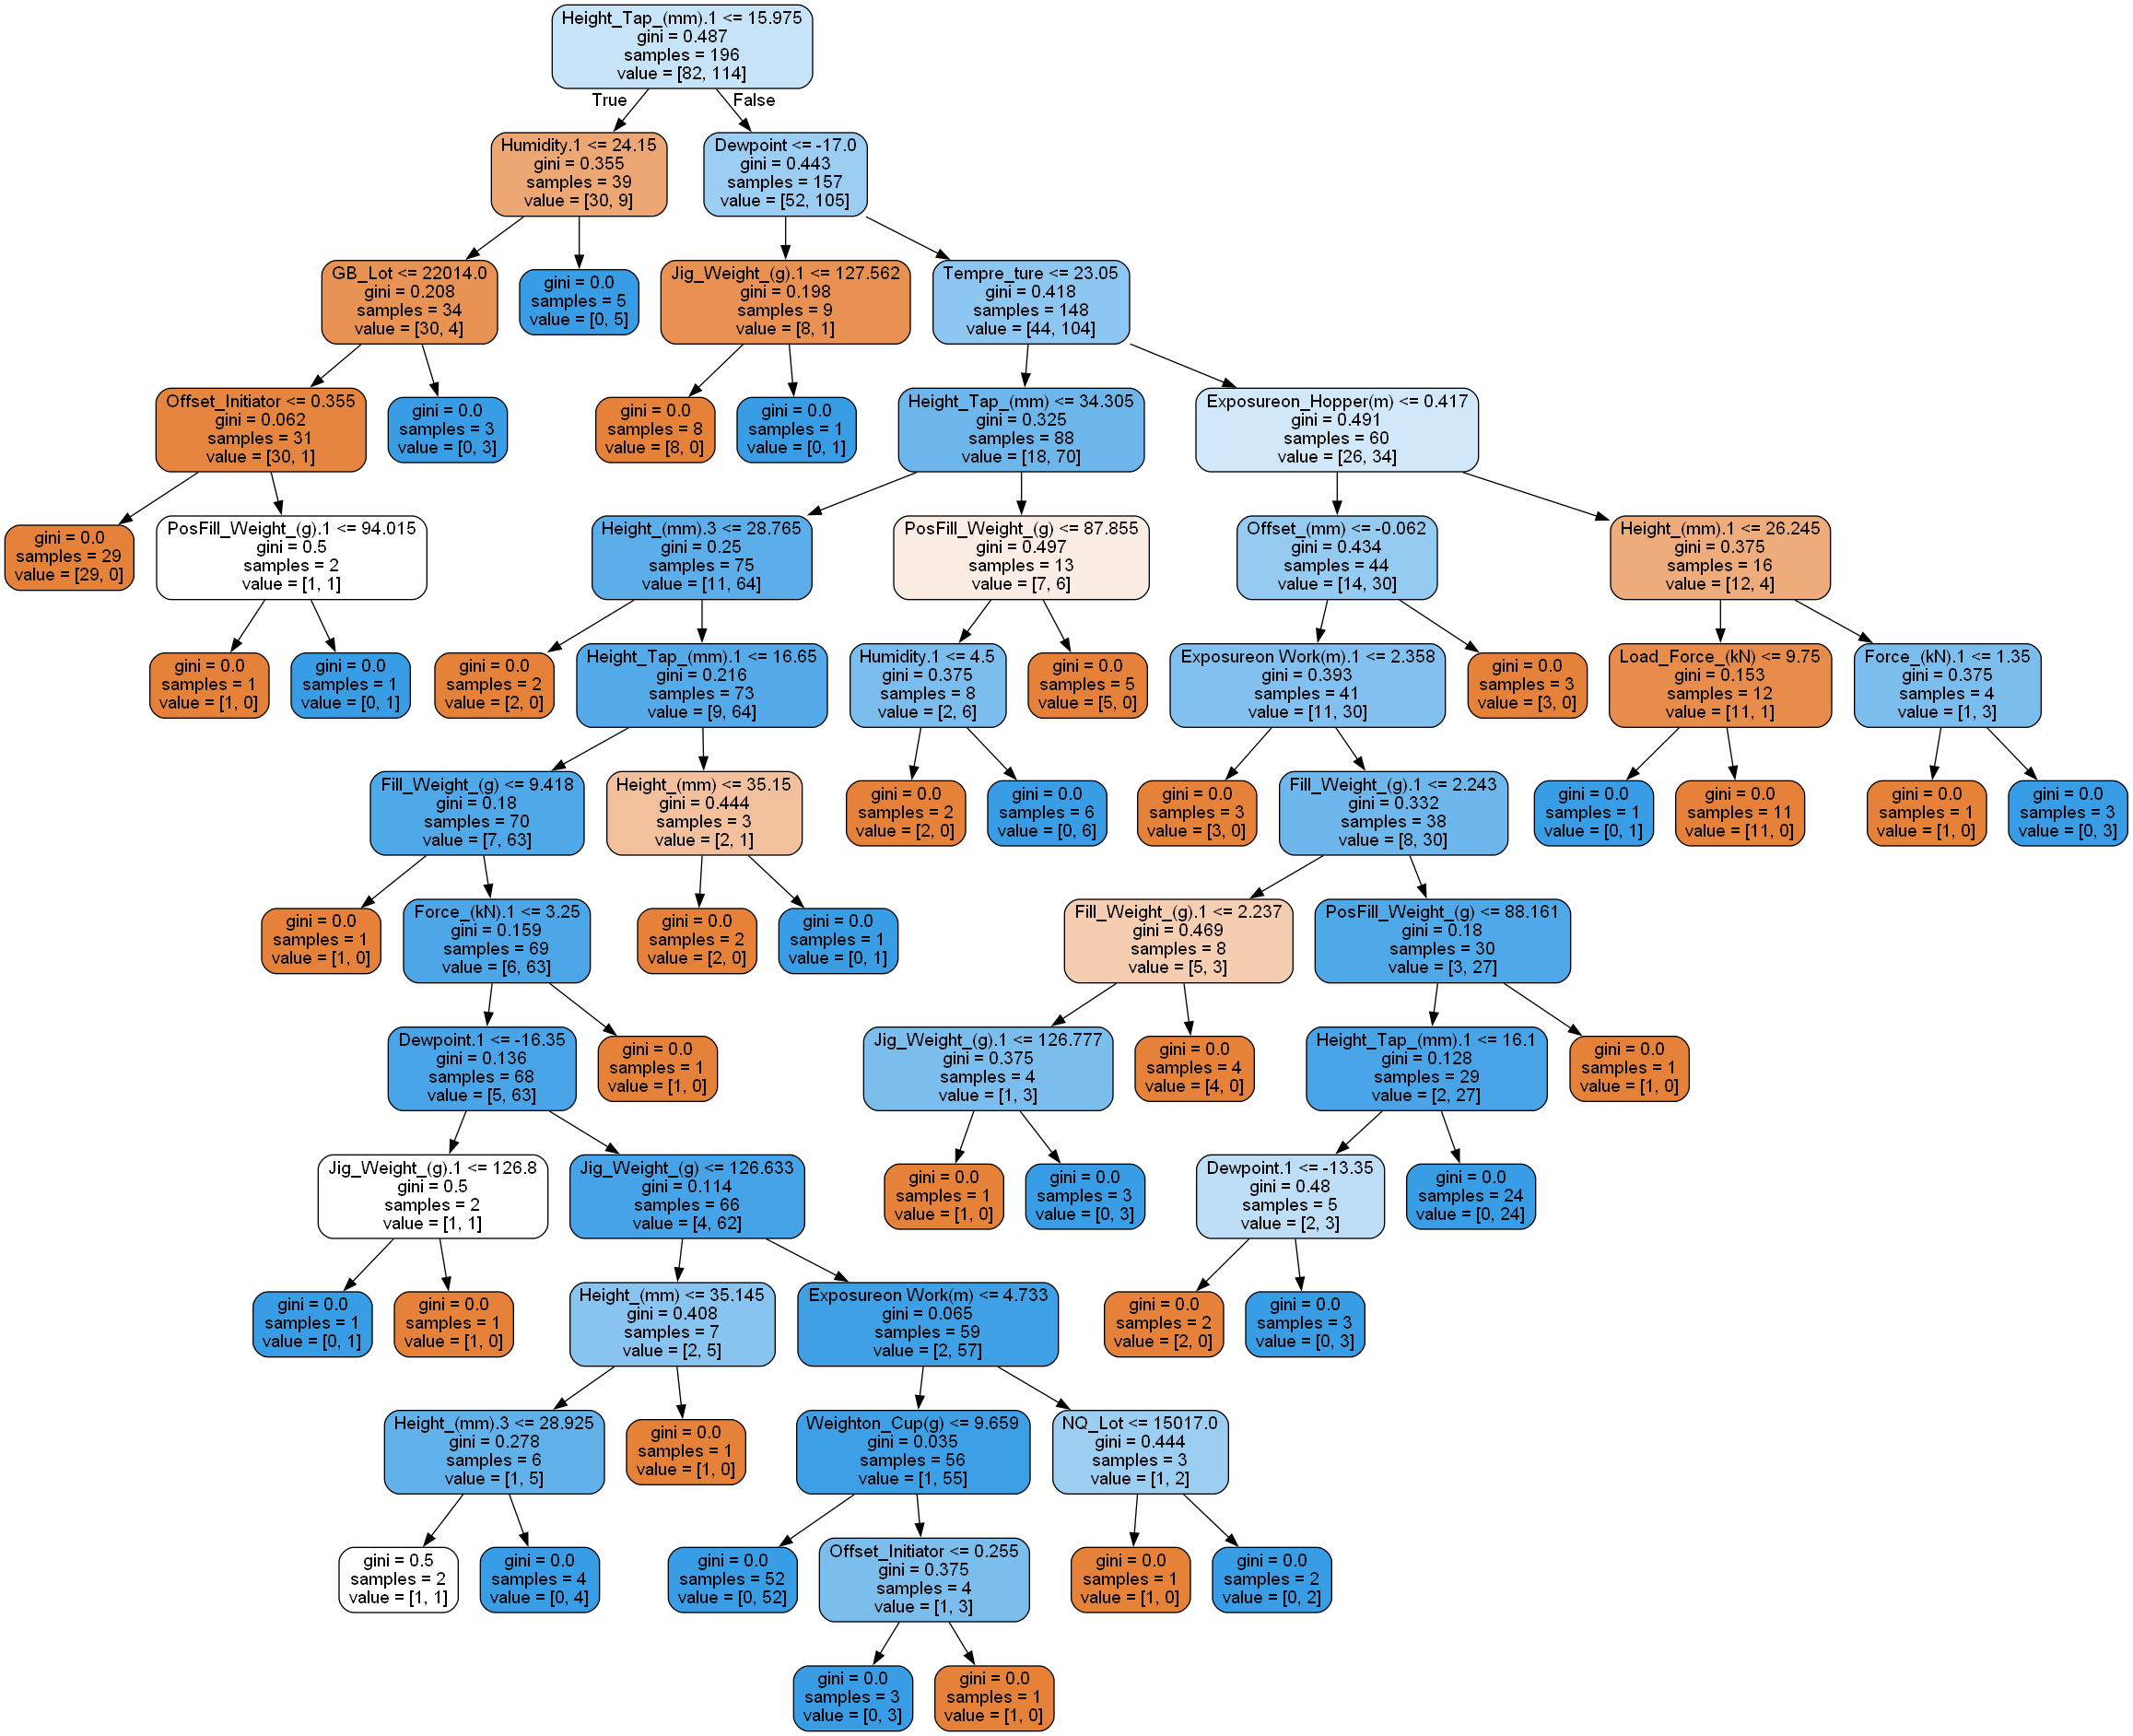

In [91]:
features = list(df.columns[1:])
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())